# please take care in running the below code
The first part is not device agnostic so it runs only on cpu
While the second can be run with both 

In [7]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torchvision.__version__

'0.25.0+cu128'

In [8]:
train_data= datasets.FashionMNIST(
    root='data',
    train=True,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

test_data= datasets.FashionMNIST(
    root= 'data',
    train= False,
    download= True,
    transform= ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.5MB/s]


In [9]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
image, label= train_data[0]
image.shape

torch.Size([1, 28, 28])

In [11]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
label

9

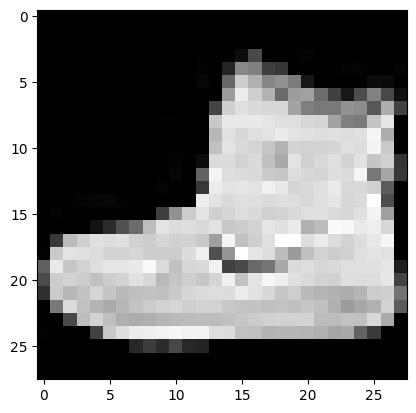

In [7]:
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

In [8]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [12]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

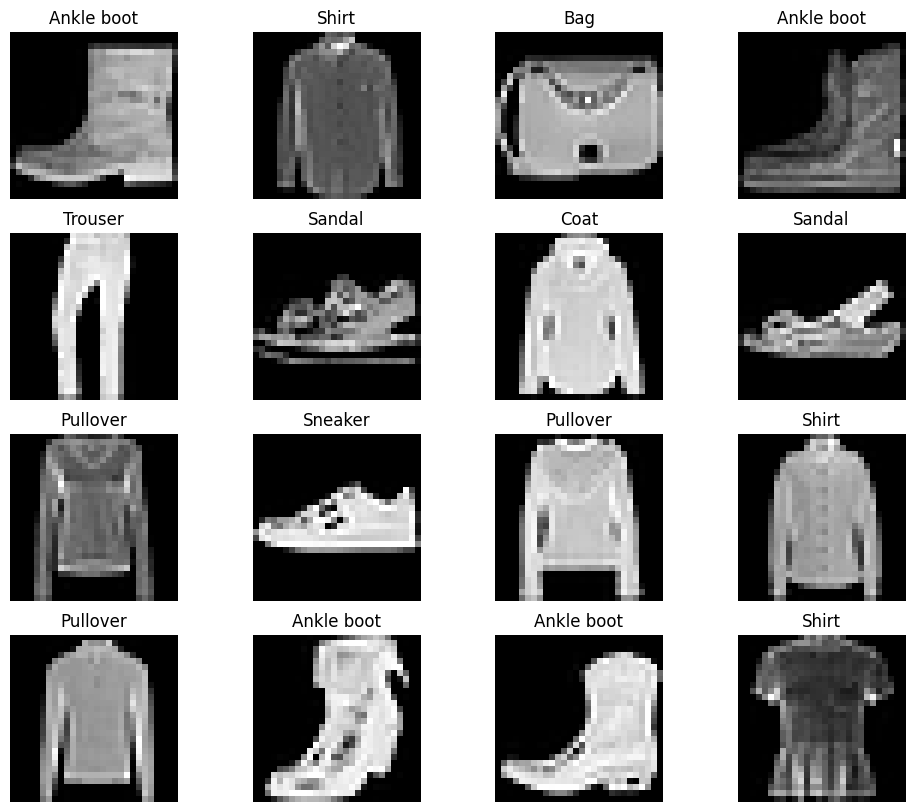

In [10]:
torch.manual_seed(42)

rows= 4
cols= 4
fig= plt.figure(figsize=(12,10))
for i in range(1,rows * cols + 1):
    randIndex= torch.randint(0, len(train_data), size=[1]).item()
    img, lbl= train_data[randIndex]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(train_data.classes[lbl])
    plt.axis(False)
    
    

In [13]:
#Now we are going to load the data, this is done because working on all of them at one time is computationaly
# difficult and borderline impossible especialy for  larger datasets

from torch.utils.data import DataLoader

BATCH_SIZE= 32
train_dataLoader= DataLoader(
    train_data,
    batch_size= BATCH_SIZE,
    shuffle= True
)

test_dataLoader= DataLoader(
    test_data,
    batch_size= BATCH_SIZE,
    shuffle= False
)

In [12]:
len(train_dataLoader), len(test_dataLoader)

(1875, 313)

In [13]:
train_img_batch, train_lbl_batch= next(iter(train_dataLoader))
train_img_batch.shape, train_lbl_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
# we can see even if we turned the data in to batches it remains unchanged
torch.manual_seed(42)
randIndex= torch.randint(1, len(train_img_batch), size=[1]).item()
img, lbl= train_img_batch[randIndex], train_lbl_batch[randIndex]
img.shape, lbl.shape

(torch.Size([1, 28, 28]), torch.Size([]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

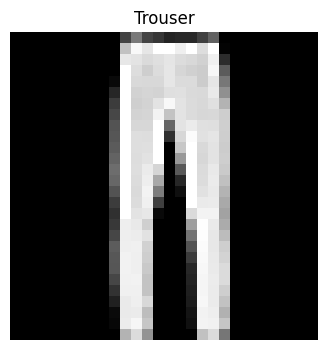

In [15]:

plt.figure(figsize=(4,4))
plt.imshow(img.squeeze(), cmap='gray')
plt.title(train_data.classes[lbl])
plt.axis(False)


Now we are going to build a baseline model
Baseline model is similar what we have done in the past but what makes it different is before using nn.Linear we 
need to flatten it since  nn.linear expects inputs shaped like [batch, number of features] and currently the shape of the images is [1, 24, 24] it has three dimension so we conver it to two using flatten 
nn.Flatten compresses the dimension: change the shape from [color channel, height,width] to [color channel, height * width]

In [16]:
# create a flatten layer
flatten_model= nn.Flatten()
# lets select one image and pass it throug the flatten model to see what it does to it
im1= train_img_batch[0]
output= flatten_model(im1)
print(f"image shape before passing through the flatten model: {im1.shape}")
print(f"image shape after passing through the flatten model: {output.shape}")

image shape before passing through the flatten model: torch.Size([1, 28, 28])
image shape after passing through the flatten model: torch.Size([1, 784])


Now seeing how flattening works we will apply it in our basline model before using directly nn.Lienar

In [17]:
# Now we are going to do our linear stacking differently than before just for learning purposes but can be done like we used to do it
# we are going to use nn.Sequential for stacking purposes

class FashionMnistModelV0 (nn.Module):
    def __init__(self, input_shape:int , output_shape:int, hidden_unit:int):
        super().__init__()
        self.stack_layer= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape, out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit, out_features= output_shape)
        )
    def forward(self, x):
        return self.stack_layer(x)

Now lets instantiate our model

In [18]:
torch.manual_seed(42)
model_input_shape=784
model_output_shape= 10
model_hidden_unit= 10
model_fashion_0= FashionMnistModelV0(model_input_shape, model_output_shape, model_hidden_unit)
model_fashion_0.to('cpu')

FashionMnistModelV0(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
# ok the next part is to train but before we do that it would be cool if we time our training so to compare 
# cpu against gpu, : currently we are set on cpu
from timeit import default_timer as timer

# lets create the function to calculate the time it took
def print_training_time(start:float, end:float, device:str)->float:
    time_range= end - start
    print(f"Training time taken by device {device} is: {time_range:.3f}" )
    return time_range

In [20]:
# Now lets setup our loss , optimizer and evaluation metrics
from sklearn.metrics import accuracy_score
lossFn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_fashion_0.parameters(), lr= 0.1)

In [21]:
# This is for CPU
from tqdm.auto import tqdm

epochs= 3
torch.manual_seed(42)
stopwatch_start= timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss= 0
    for batch,(X, y) in enumerate(train_dataLoader):
        model_fashion_0.train()
        y_pred= model_fashion_0(X)
        
        loss= lossFn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {(len(train_dataLoader.dataset))}")
    train_loss /= len(train_dataLoader)
    
    test_loss, test_accur= 0, 0
    model_fashion_0.eval()
    with torch.inference_mode():
        for xt, yt in test_dataLoader:
            y_test_logit= model_fashion_0(xt)
            lss= lossFn(y_test_logit, yt)
            test_loss += lss.item()
            acc= accuracy_score(yt.cpu().numpy(), torch.argmax(y_test_logit, dim=1).cpu().numpy())
            test_accur += acc
        
        test_accur /= len(test_dataLoader)
        test_loss /= len(test_dataLoader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss}, Test acc: {test_accur:.2f}%\n")
            
stopwatch_stop= timer()
total_train_time= print_training_time(stopwatch_start, stopwatch_stop, "CPU")
        


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.59039 | Test loss: 0.5095350872308683, Test acc: 0.82%

Epoch: 1
-------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.47633 | Test loss: 0.4798899652382817, Test acc: 0.83%

Epoch: 2
-------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.45503 | Test loss: 0.47663889553981087, Test acc: 0.83%

Training time taken by device CPU is: 43.047


In [16]:
ls

data/  sample_data/  utils/


In [18]:
from utils.model_evaluator import eval_model

Ok now lets build another model which we will run on GPU

In [19]:
# First we will define some device agnosti code
import torch
from torch import nn
from sklearn.metrics import accuracy_score
torch.cuda.is_available()

True

In [20]:
if torch.cuda.is_available():
    device= "cuda:0"
else:
    device= "cpu"
    

In [31]:
# here to show that it is possible, we will not do sequential stacking
class FashionMnistModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer0= nn.Flatten()
        self.layer1= nn.Linear(in_features= 784, out_features=256)
        self.layer2 = nn.Linear(in_features=256, out_features=128)
        self.layer3= nn.Linear(in_features=128, out_features=10)
        self.relu= nn.ReLU()
    
    def forward(self, x:torch.Tensor)-> torch.Tensor:
        rs= self.layer0(x)
        rs= self.layer1(rs)
        rs= self.relu(rs)
        rs= self.layer2(rs)
        rs= self.relu(rs)
        rs= self.layer3(rs)
        return rs

In [32]:
torch.cuda.is_available()

True

In [34]:
from tqdm.auto import tqdm
model_fashion_1= FashionMnistModelV1().to(device)  
lossFN= nn.CrossEntropyLoss()
optm= torch.optim.Adam(params=model_fashion_1.parameters(), lr=0.003)

ac_average= 0
train_loss_avg= 0
epochs= 3
time_start= timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch + 1} -------------------------------- \n")
    train_loss= 0
    ac_average=0
    for batch, (A, b) in enumerate(train_dataLoader):
        model_fashion_1.train()
        
        y_logits= model_fashion_1(A.to(device))
        ac_average += accuracy_score(b.cpu().detach().numpy() , torch.argmax(y_logits.cpu(), dim=1).detach().numpy())
        
        ls=lossFN(y_logits, b.to(device))
        train_loss += ls.item()
        
        optm.zero_grad()
        
        ls.backward()
        
        optm.step()
        if batch % 400 == 0:
            print(f"Covered {len(A) * (batch + 1)} / { len(train_dataLoader.dataset)}")
    
    train_loss_avg = train_loss / len(train_dataLoader)
    ac_average = ac_average / len(train_dataLoader)
    
    model_fashion_1.eval()
    result= eval_model(model_fashion_1, test_dataLoader, lossFN, device)
    print(f"Train Accuracy: {ac_average} ..................... Train Loss: {train_loss_avg}")
    print(f"Test Accuracy: {result['Model accuracy']} .................... Test Loss: {result['Model loss']}")
    
time_stop= timer()
time_taken= print_training_time(time_start, time_stop, device)
        
        

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 -------------------------------- 

Covered 32 / 60000
Covered 12832 / 60000
Covered 25632 / 60000
Covered 38432 / 60000
Covered 51232 / 60000
Train Accuracy: 0.8212666666666667 ..................... Train Loss: 0.49288339399496717
Test Accuracy: 0.8298722044728435 .................... Test Loss: 0.45721987780100243
Epoch: 2 -------------------------------- 

Covered 32 / 60000
Covered 12832 / 60000
Covered 25632 / 60000
Covered 38432 / 60000
Covered 51232 / 60000
Train Accuracy: 0.8614 ..................... Train Loss: 0.37889807963967326
Test Accuracy: 0.8650159744408946 .................... Test Loss: 0.3793900911562359
Epoch: 3 -------------------------------- 

Covered 32 / 60000
Covered 12832 / 60000
Covered 25632 / 60000
Covered 38432 / 60000
Covered 51232 / 60000
Train Accuracy: 0.87145 ..................... Train Loss: 0.34945900320808093
Test Accuracy: 0.8644169329073482 .................... Test Loss: 0.3827036146324473
Training time taken by device cuda:0 is: 37.530